In [ ]:
import tensorflow as tf

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:
import os
import matplotlib.pyplot as plt
import numpy as np

In [ ]:
_URL="https://storage.googleapis.com/mledu-datasets/cats_and_dogs_filtered.zip"
zip_dir = tf.keras.utils.get_file('cats_and_dogs_filterted.zip', origin=_URL,extract=True)


68606236/68606236 [==============================] - 3s 0us/step


In [28]:
zip_dir_base = os.path.dirname(zip_dir)
!find $zip_dir_base -type d -print

/root/.keras/datasets
/root/.keras/datasets/cats_and_dogs_filtered
/root/.keras/datasets/cats_and_dogs_filtered/validation
/root/.keras/datasets/cats_and_dogs_filtered/validation/dogs
/root/.keras/datasets/cats_and_dogs_filtered/validation/cats
/root/.keras/datasets/cats_and_dogs_filtered/train
/root/.keras/datasets/cats_and_dogs_filtered/train/dogs
/root/.keras/datasets/cats_and_dogs_filtered/train/cats


In [29]:
labels = ["Cat", "Dog"]
labels_dict = {i: name for i, name in enumerate(labels)}

In [ ]:
base_dir = os.path.join(os.path.dirname(zip_dir), 'cats_and_dogs_filtered')
train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

In [ ]:
total_size = len(os.listdir(train_cats_dir)) + len(os.listdir(train_dogs_dir))
total_val = len(os.listdir(validation_cats_dir)) + len(os.listdir(validation_dogs_dir))


In [ ]:
 print(len(os.listdir(train_cats_dir)))
print(len(os.listdir(train_dogs_dir)))

1000
1000


In [ ]:
# validation
print(len(os.listdir(validation_cats_dir)))
print(len(os.listdir(validation_dogs_dir)))

500
500


## **Setting Model Parameters**

In [ ]:
BATCH_SIZE = 100
IMAGE_SIZE = 150

## **The loading, decoding of the image to RGB, and into proper grid format, converting them into**
## **floating point tensors, and resacling the values from 0 to 255 to 0 and 1 are done by the** **ImageDataGenerator**

In [ ]:
train_image_generator = ImageDataGenerator(rescale=1./255)
validation_image_generator = ImageDataGenerator(rescale=1./255)

## **After defining our generators for training and validation images, flow_from_directory method will**
## **load images from the disk, apply rescaling, and resize them using single line of code.**

In [ ]:
train_data_gen = train_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
directory=train_dir,
shuffle=True,
target_size=(IMAGE_SIZE,IMAGE_SIZE),
class_mode='binary')

Found 2000 images belonging to 2 classes.


In [ ]:
test_data_gen = validation_image_generator.flow_from_directory(batch_size=BATCH_SIZE,
directory=validation_dir,
shuffle=False,
target_size=(IMAGE_SIZE, IMAGE_SIZE),
class_mode='binary')


Found 1000 images belonging to 2 classes.


## **Visualizing the images**

In [ ]:
sample_training_images, _ = next(train_data_gen)

In [ ]:
def plotImages(images_arr):
  fig, axes = plt.subplots(1,5, figsize=(20,20))
  axes = axes.flatten()
  for img, ax in zip(images_arr, axes):
    ax.imshow(img)
  plt.tight_layout()
  plt.show()


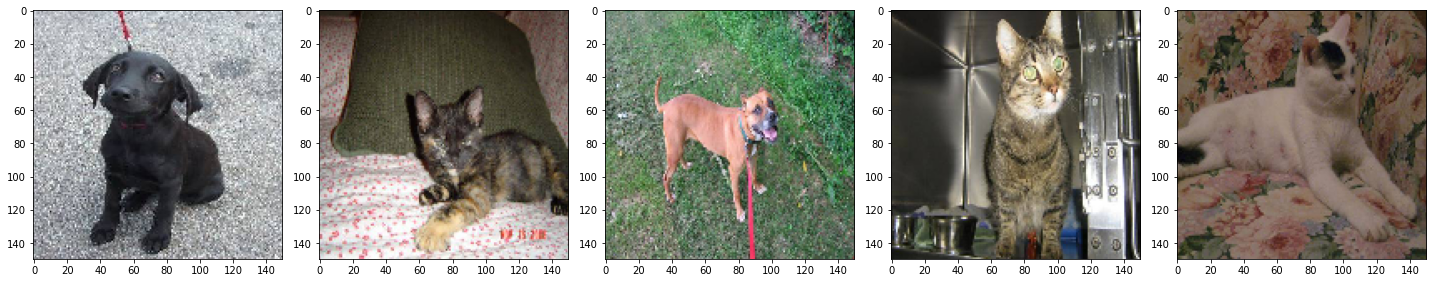

In [ ]:
plotImages(sample_training_images[:5])


## **Defining the model**

In [ ]:
model = tf.keras.models.Sequential([
tf.keras.layers.Conv2D(32, (3,3), activation='relu',input_shape=(150,150,3)),
tf.keras.layers.MaxPool2D(2,2),
tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
tf.keras.layers.MaxPool2D(2,2),
tf.keras.layers.Conv2D(128,(3,3), activation='relu'),
tf.keras.layers.MaxPool2D(2,2),
tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
tf.keras.layers.MaxPool2D(2,2),
tf.keras.layers.Flatten(),
tf.keras.layers.Dense(512, activation='relu'),
tf.keras.layers.Dense(2)
])


## **Compiling the Model**

In [ ]:
 model.compile(optimizer='adam',
loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
metrics=['accuracy'])


## **Summary**

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 148, 148, 32)      896       
                                                                 
 max_pooling2d (MaxPooling2D  (None, 74, 74, 32)       0         
 )                                                               
                                                                 
 conv2d_1 (Conv2D)           (None, 72, 72, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 36, 36, 64)       0         
 2D)                                                             
                                                                 
 conv2d_2 (Conv2D)           (None, 34, 34, 128)       73856     
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 17, 17, 128)      0

## **Train the Model**


In [ ]:
 epochs = 10
history = model.fit_generator(
train_data_gen,
steps_per_epoch=int(np.ceil(total_size/float(BATCH_SIZE))),
epochs=epochs,
validation_data=test_data_gen,
validation_steps=int(np.ceil(total_val/float(BATCH_SIZE)))
)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  import sys


Epoch 1/10
20/20 [==============================] - 143s 7s/step - loss: 0.7656 - accuracy: 0.5290 - val_loss: 0.6933 - val_accuracy: 0.5000
Epoch 2/10
20/20 [==============================] - 123s 6s/step - loss: 0.6926 - accuracy: 0.5100 - val_loss: 0.6932 - val_accuracy: 0.5000
Epoch 3/10
20/20 [==============================] - 126s 6s/step - loss: 0.6909 - accuracy: 0.5015 - val_loss: 0.6866 - val_accuracy: 0.5930
Epoch 4/10
20/20 [==============================] - 125s 6s/step - loss: 0.6821 - accuracy: 0.5550 - val_loss: 0.6615 - val_accuracy: 0.6120
Epoch 5/10
20/20 [==============================] - 117s 6s/step - loss: 0.6568 - accuracy: 0.6085 - val_loss: 0.6470 - val_accuracy: 0.6210
Epoch 6/10
20/20 [==============================] - 113s 6s/step - loss: 0.6385 - accuracy: 0.6160 - val_loss: 0.6762 - val_accuracy: 0.5740
Epoch 7/10
20/20 [==============================] - 115s 6s/step - loss: 0.6290 - accuracy: 0.6240 - val_loss: 0.6238 - val_accuracy: 0.6360
Epoch 8/10
20

## **Visualizing results of the training**

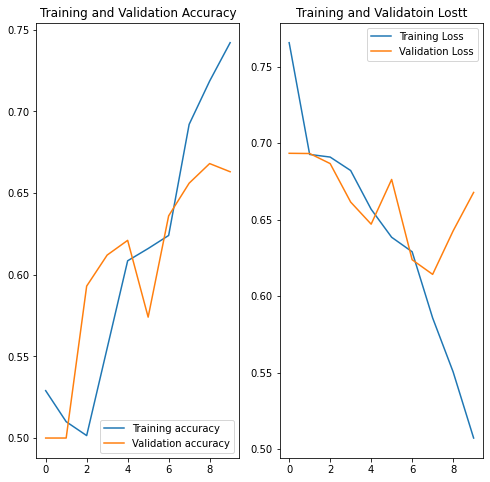

In [ ]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs_range = range(epochs)
plt.figure(figsize=(8,8))
plt.subplot(1,2,1)
plt.plot(epochs_range, acc, label="Training accuracy")
plt.plot(epochs_range, val_acc,label="Validation accuracy")
plt.legend(loc="lower right")
plt.title("Training and Validation Accuracy")
plt.subplot(1,2,2)
plt.plot(epochs_range, loss, label = "Training Loss")
plt.plot(epochs_range, val_loss,label = "Validation Loss")
plt.legend(loc="upper right")
plt.title("Training and Validatoin Lostt")
plt.show()

## **Prediction**

In [24]:
test = test_data_gen[0][0][0:]

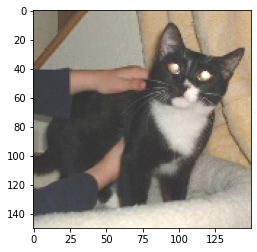

In [25]:
plt.imshow(test[0])

In [26]:
pred = np.argmax(model.predict(test[:1]))

1/1 [==============================] - 0s 167ms/step


In [30]:
labels_dict[pred.astype("int32")]

'Cat'